# Analyze Data
## Load in Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load in Data and Remove Unnecessary Columns

In [2]:
master_mood = pd.read_csv('master_mood.csv')
master_mood

,Unnamed: 0,Name,Track_ID,Album,Artist,Artist_ID,Artist_Genre,Duration_ms,Popularity,Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Playlist,Mood,MoodR,ExplicitR
0,0,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,"['piano rock', 'pop', 'pop rock']",148485,97,False,...,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Mood_Booster,Happy,1,0
1,1,As It Was,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,6KImCVD70vtIoJWnq6nGn3,['pop'],167303,96,False,...,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Mood_Booster,Happy,1,0
2,2,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,"['dance pop', 'pop', 'viral pop']",154486,93,False,...,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Mood_Booster,Happy,1,0
3,3,SNAP,76OGwb5RA9h4FxQPT33ekc,SNAP,Rosa Linn,46xBNx0j6cwY6sD9LgMTm1,[],179551,93,False,...,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Mood_Booster,Happy,1,0
4,4,Sunroof,4h4QlmocP3IuwYEj2j14p8,Sunroof,Nicky Youre,7qmpXeNz2ojlMl2EEfkeLs,[],163025,93,False,...,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Mood_Booster,Happy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,955,Oh!,4e72LGraX8sW5iztJvS5fo,Oh!,The Linda Lindas,13dTrWNNrnZ3AkgNyQNKP5,['riot grrrl'],155821,48,False,...,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Walk_Like_A_Badass,Confidence,5,0
947,956,God Complex (Mojo),1B3ouXA9iRkqY1ywvZbzZ5,God Complex (Mojo),poutyface,0H44O4IYqpTOGx4c5nV37f,"['alt z', 'modern indie pop', 'viral rap']",106740,48,True,...,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Walk_Like_A_Badass,Confidence,5,1
948,957,I EXIST,3eI62ZWWxkl4LUaBqXvA6Y,I EXIST,VUKOVI,1844Ua6R4gOuH6GLdlR4dt,"['modern alternative rock', 'modern rock', 'pi...",269666,49,True,...,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Walk_Like_A_Badass,Confidence,5,1
949,958,Apartment Complex on the Eastside,1cRk9clJhi67mcfTxNfnjU,It Took A Lot To Get To This,Dylan Fraser,6Awp6fgyzqQ2XuEvOMjq8D,[],247545,41,True,...,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Walk_Like_A_Badass,Confidence,5,1


In [3]:
mood_cleaned = master_mood.drop(['Unnamed: 0', 'Name', 'Track_ID', 'Album', 'Artist','Artist_ID','Artist_Genre', 'Explicit', 'Playlist', 'MoodR'], axis = 1)
mood_cleaned

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,0,-8.198,1,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,155821,48,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
947,106740,48,0.573,0.723,6,-3.333,0,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
948,269666,49,0.469,0.882,5,-4.702,1,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
949,247545,41,0.469,0.885,1,-5.433,1,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


In [4]:
mood_no_out = pd.read_csv('mood_no_out.csv')
mood_no_out

,Unnamed: 0,Name,Track_ID,Album,Artist,Artist_ID,Artist_Genre,Duration_ms,Popularity,Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Playlist,Mood,MoodR,ExplicitR
0,0,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,"['piano rock', 'pop', 'pop rock']",148485,97,False,...,0.0475,0.08260,0.000745,0.0546,0.825,139.994,Mood_Booster,Happy,1,0
1,2,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,"['dance pop', 'pop', 'viral pop']",154486,93,False,...,0.0324,0.61900,0.000013,0.0901,0.719,101.058,Mood_Booster,Happy,1,0
2,4,Sunroof,4h4QlmocP3IuwYEj2j14p8,Sunroof,Nicky Youre,7qmpXeNz2ojlMl2EEfkeLs,[],163025,93,False,...,0.0401,0.35200,0.000000,0.1500,0.842,131.443,Mood_Booster,Happy,1,0
3,5,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,Twelve Carat Toothache,Post Malone,246dkjvS1zLTtiykXe5h60,"['dfw rap', 'melodic rap', 'rap']",192840,92,True,...,0.0751,0.12100,0.000000,0.1210,0.472,100.964,Mood_Booster,Happy,1,1
4,6,Dandelions,2eAvDnpXP5W0cVtiI0PUxV,Safe Haven,Ruth B.,2WzaAvm2bBCf4pEhyuDgCY,"['alt z', 'canadian contemporary r&b', 'canadi...",233720,91,False,...,0.0259,0.01570,0.000000,0.0864,0.454,116.959,Mood_Booster,Happy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,936,I.N.V.U.,6qTagiSQjEcfpVm1NHJJEU,I.N.V.U.,Kid Kapichi,2iwVdN0Geaw5Sn2Abeh9fB,"['british alternative rock', 'english indie ro...",163560,48,False,...,0.0843,0.00611,0.000027,0.0314,0.965,125.126,Walk_Like_A_Badass,Confidence,5,0
509,941,Fuck Me (I Didn’t Know How To Say),07M8tCNuO9RZenyINtp2QB,Fuck Me (I Didn’t Know How To Say),Crawlers,2xtmoxSauQs0TQFUoHmbfy,"['indie pop', 'warrington indie']",186786,56,True,...,0.0892,0.02630,0.001220,0.0911,0.555,179.346,Walk_Like_A_Badass,Confidence,5,1
510,942,THREE HEADS*,4apXjryIqMFUdOjWMM6zZp,THREE HEADS*,Jean Dawson,7vNNmjV14SKQzlQAEg0BXP,['modern indie pop'],171842,60,False,...,0.0520,0.44300,0.000158,0.0787,0.610,139.991,Walk_Like_A_Badass,Confidence,5,0
511,943,What Went Down,78tgXRq9Q6tPNP9hKCpgwB,What Went Down,Foals,6FQqZYVfTNQ1pCqfkwVFEa,"['indie rock', 'modern rock', 'oxford indie', ...",300720,56,False,...,0.0722,0.00313,0.004420,0.0643,0.128,146.940,Walk_Like_A_Badass,Confidence,5,0


In [5]:
mood_no_out = mood_no_out.drop(['Unnamed: 0','Name', 'Track_ID', 'Album', 'Artist','Artist_ID','Artist_Genre', 'Explicit', 'Playlist', 'MoodR'], axis = 1)
mood_no_out

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,Happy,0
1,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,Happy,0
2,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.35200,0.000000,0.1500,0.842,131.443,Happy,0
3,192840,92,0.733,0.670,5,-6.009,1,0.0751,0.12100,0.000000,0.1210,0.472,100.964,Happy,1
4,233720,91,0.609,0.692,1,-2.958,1,0.0259,0.01570,0.000000,0.0864,0.454,116.959,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,163560,48,0.778,0.780,0,-5.300,1,0.0843,0.00611,0.000027,0.0314,0.965,125.126,Confidence,0
509,186786,56,0.521,0.679,8,-6.093,1,0.0892,0.02630,0.001220,0.0911,0.555,179.346,Confidence,1
510,171842,60,0.564,0.875,6,-4.013,1,0.0520,0.44300,0.000158,0.0787,0.610,139.991,Confidence,0
511,300720,56,0.231,0.919,2,-6.182,0,0.0722,0.00313,0.004420,0.0643,0.128,146.940,Confidence,0


In [6]:
mood_no_ex = pd.read_csv("mood_no_ex.csv")
mood_no_ex

,Unnamed: 0,Name,Track_ID,Album,Artist,Artist_ID,Artist_Genre,Duration_ms,Popularity,Explicit,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Playlist,Mood,MoodR,ExplicitR
0,0,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,I Ain’t Worried (Music From The Motion Picture...,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,"['piano rock', 'pop', 'pop rock']",148485,97,False,...,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Mood_Booster,Happy,1,0
1,1,As It Was,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,6KImCVD70vtIoJWnq6nGn3,['pop'],167303,96,False,...,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Mood_Booster,Happy,1,0
2,2,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,"['dance pop', 'pop', 'viral pop']",154486,93,False,...,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Mood_Booster,Happy,1,0
3,3,SNAP,76OGwb5RA9h4FxQPT33ekc,SNAP,Rosa Linn,46xBNx0j6cwY6sD9LgMTm1,[],179551,93,False,...,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Mood_Booster,Happy,1,0
4,4,Sunroof,4h4QlmocP3IuwYEj2j14p8,Sunroof,Nicky Youre,7qmpXeNz2ojlMl2EEfkeLs,[],163025,93,False,...,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Mood_Booster,Happy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,946,Oh!,4e72LGraX8sW5iztJvS5fo,Oh!,The Linda Lindas,13dTrWNNrnZ3AkgNyQNKP5,['riot grrrl'],155821,48,False,...,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Walk_Like_A_Badass,Confidence,5,0
935,947,God Complex (Mojo),1B3ouXA9iRkqY1ywvZbzZ5,God Complex (Mojo),poutyface,0H44O4IYqpTOGx4c5nV37f,"['alt z', 'modern indie pop', 'viral rap']",106740,48,True,...,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Walk_Like_A_Badass,Confidence,5,1
936,948,I EXIST,3eI62ZWWxkl4LUaBqXvA6Y,I EXIST,VUKOVI,1844Ua6R4gOuH6GLdlR4dt,"['modern alternative rock', 'modern rock', 'pi...",269666,49,True,...,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Walk_Like_A_Badass,Confidence,5,1
937,949,Apartment Complex on the Eastside,1cRk9clJhi67mcfTxNfnjU,It Took A Lot To Get To This,Dylan Fraser,6Awp6fgyzqQ2XuEvOMjq8D,[],247545,41,True,...,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Walk_Like_A_Badass,Confidence,5,1


In [7]:
mood_no_ex = mood_no_ex.drop(['Unnamed: 0', 'Name', 'Track_ID', 'Album', 'Artist','Artist_ID','Artist_Genre', 'Explicit', 'Playlist', 'MoodR'], axis = 1)
mood_no_ex

,Duration_ms,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Mood,ExplicitR
0,148485,97,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,Happy,0
1,167303,96,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,Happy,0
2,154486,93,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,Happy,0
3,179551,93,0.565,0.636,0,-8.198,1,0.0638,0.107000,0.000010,0.4470,0.525,170.010,Happy,0
4,163025,93,0.768,0.714,10,-5.110,1,0.0401,0.352000,0.000000,0.1500,0.842,131.443,Happy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,155821,48,0.639,0.950,2,-3.313,1,0.0609,0.000039,0.494000,0.0605,0.898,150.050,Confidence,0
935,106740,48,0.573,0.723,6,-3.333,0,0.0571,0.004390,0.335000,0.4080,0.931,154.958,Confidence,1
936,269666,49,0.469,0.882,5,-4.702,1,0.0680,0.000063,0.004830,0.3180,0.298,135.055,Confidence,1
937,247545,41,0.469,0.885,1,-5.433,1,0.0577,0.075800,0.035200,0.3460,0.330,149.916,Confidence,1


## Creating First KNN Model with All Songs
### Creating X and Y Variables

In [8]:
x = mood_cleaned.drop('Mood', axis=1)
y = mood_cleaned['Mood']

### Scaling Data

In [9]:
scaler = StandardScaler()
scaler.fit(x)
scaledVariables = scaler.transform(x)
moodScaled1= pd.DataFrame(scaledVariables, columns=x.columns[:])

### Spliting Data into Test and Training 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(moodScaled1,y,test_size=0.3)

### KNN Analysis

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [12]:
print(confusion_matrix(y_test, pred))

[[51  0  2  6  1]
 [ 3 36 13  5  1]
 [ 0  5 36  6 10]
 [12  1  4 21 17]
 [ 4  2  9 11 30]]


In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Chill       0.73      0.85      0.78        60
  Confidence       0.82      0.62      0.71        58
       Happy       0.56      0.63      0.60        57
     Romance       0.43      0.38      0.40        55
         Sad       0.51      0.54      0.52        56

    accuracy                           0.61       286
   macro avg       0.61      0.60      0.60       286
weighted avg       0.61      0.61      0.61       286



#### This model has only an accuracy of only 61%, so not great.  Let's see if we can make it better.

### Choosing Best Model

In [14]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

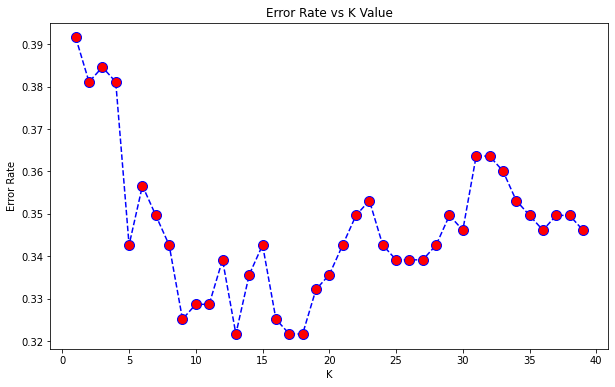

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [17]:
print(confusion_matrix(y_test, pred))

[[53  0  4  2  1]
 [ 1 39 12  5  1]
 [ 0  4 42  2  9]
 [11  1  7 14 22]
 [ 0  0 13  6 37]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Chill       0.82      0.88      0.85        60
  Confidence       0.89      0.67      0.76        58
       Happy       0.54      0.74      0.62        57
     Romance       0.48      0.25      0.33        55
         Sad       0.53      0.66      0.59        56

    accuracy                           0.65       286
   macro avg       0.65      0.64      0.63       286
weighted avg       0.65      0.65      0.64       286



#### This got the accuracy up to 65%, better, but still pretty poor. 

## Second KNN Model with All Outliers Removed
### Creating X and Y Variables

In [19]:
x = mood_no_out.drop('Mood', axis=1)
y = mood_no_out['Mood']

### Scaling X Variable

In [20]:
scaler = StandardScaler()
scaler.fit(x)
scaledVariables = scaler.transform(x)
moodScaled2= pd.DataFrame(scaledVariables, columns=x.columns[:])

### Splitting into test and train

In [21]:
x_train, x_test, y_train, y_test = train_test_split(moodScaled2,y,test_size=0.3)

### KNN Analysis

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [23]:
print(confusion_matrix(y_test, pred))

[[ 3  0  0  5  2]
 [ 2  6  4  4  2]
 [ 0  3 26  3  3]
 [ 3  2  5 14 20]
 [ 1  1  8  6 31]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Chill       0.33      0.30      0.32        10
  Confidence       0.50      0.33      0.40        18
       Happy       0.60      0.74      0.67        35
     Romance       0.44      0.32      0.37        44
         Sad       0.53      0.66      0.59        47

    accuracy                           0.52       154
   macro avg       0.48      0.47      0.47       154
weighted avg       0.51      0.52      0.50       154



#### Oh wow! This model only has a macro average of 48% and an overall accuracy of 52%. Pretty bad and worse the previous model.

### Choosing Best Model

In [25]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

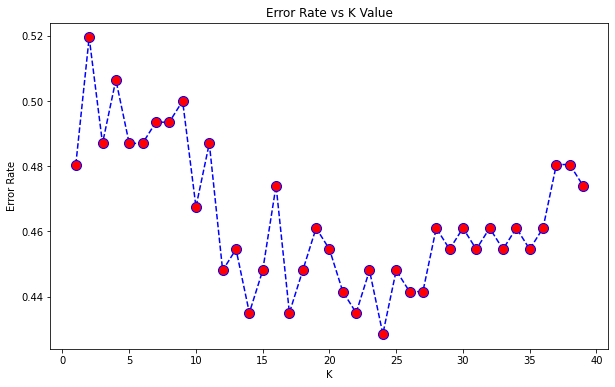

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [28]:
print(confusion_matrix(y_test, pred))

[[ 2  0  3  1  4]
 [ 0  3  9  2  4]
 [ 0  0 31  1  3]
 [ 2  0  7  8 27]
 [ 0  0  7  0 40]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Chill       0.50      0.20      0.29        10
  Confidence       1.00      0.17      0.29        18
       Happy       0.54      0.89      0.67        35
     Romance       0.67      0.18      0.29        44
         Sad       0.51      0.85      0.64        47

    accuracy                           0.55       154
   macro avg       0.64      0.46      0.43       154
weighted avg       0.62      0.55      0.48       154



#### Better than before, but still only a 55% overall accuracy. This dataset definitely isn't the one for the KNN models.

## Creating Third KNN Model with Extreme Outliers Removed
### Creating X and Y Variables

In [30]:
x = mood_no_ex.drop('Mood', axis=1)
y = mood_no_ex['Mood']

### Scaling X Variables

In [31]:
scaler = StandardScaler()
scaler.fit(x)
scaledVariables = scaler.transform(x)
moodScaled3= pd.DataFrame(scaledVariables, columns=x.columns[:])

### Splitting Data into Train and Test

In [32]:
x_train, x_test, y_train, y_test = train_test_split(moodScaled3,y,test_size=0.3)

### KNN Analysis

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [34]:
print(confusion_matrix(y_test, pred))

[[47  0  0  9  1]
 [ 5 36  5  8  8]
 [ 1 11 32  8  6]
 [11  4  5 20 15]
 [ 2  0  5 12 31]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Chill       0.71      0.82      0.76        57
  Confidence       0.71      0.58      0.64        62
       Happy       0.68      0.55      0.61        58
     Romance       0.35      0.36      0.36        55
         Sad       0.51      0.62      0.56        50

    accuracy                           0.59       282
   macro avg       0.59      0.59      0.59       282
weighted avg       0.60      0.59      0.59       282



#### Still at about the same accuracy range as the other models. 

### Choosing Best Model

In [36]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

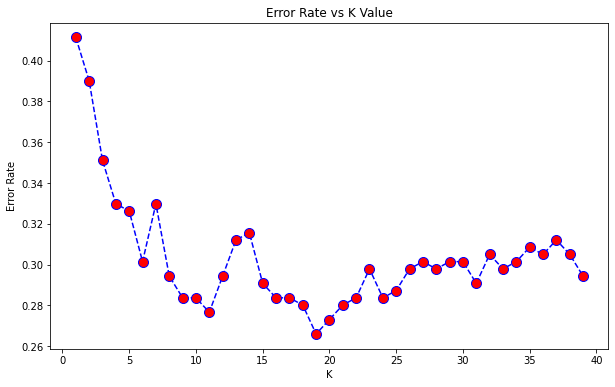

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [39]:
print(confusion_matrix(y_test, pred))

[[55  0  0  0  2]
 [ 3 44  7  6  2]
 [ 1  2 51  1  3]
 [ 9  1  6 17 22]
 [ 0  2  3  5 40]]


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Chill       0.81      0.96      0.88        57
  Confidence       0.90      0.71      0.79        62
       Happy       0.76      0.88      0.82        58
     Romance       0.59      0.31      0.40        55
         Sad       0.58      0.80      0.67        50

    accuracy                           0.73       282
   macro avg       0.73      0.73      0.71       282
weighted avg       0.73      0.73      0.72       282



#### Eh! 73% Not too shabby, especially when comparing it to the other models. 
### The KNN Models were so bad, I think that random forest will be the way to go. 